# EDA template

In [ ]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline 
#ensure that plots are displayed inside the notebook
import pyodbc
import seaborn as sns
import JSON
import pyarrow
import gzip
from lxml import objectify

## <u> Reading the data in a dataframe

In [ ]:
# csv
df = pd.read_csv("file.csv", index_col=0, header=0, parse_dates=True, delimiter=';', encoding = "ISO-8859-1")

In [ ]:
# HTML
url = "https://www. ..."
df = pd.read_html(url, index_col=0)

In [ ]:
# JSON
df = pd.read_json("file.json")

In [ ]:
# parquet
df = pd.read_parquet("file.parquet")

In [ ]:
# parquet gzipped
df = pd.read_parquet("file.parquet.gzip")

In [ ]:
# local database
DRIVER_DB = 'MySQL ODBC 8.0 ANSI Driver'
SERVER_DB = '127.0.0.1'
NAME_DB = 'db'
USERNAME_DB = 'usr'
PASSWORD_DB = 'pwd'

cnxn = pyodbc.connect(DRIVER=DRIVER_DB, SERVER=SERVER_DB, DATABASE=NAME_DB, UID=USERNAME_DB, PWD=PASSWORD_DB)
df = pd.read_sql_query("SELECT * FROM TABLE_patients;", cnxn)

## <u> EDA


In [ ]:
# get the name of the columns in the dataframe
print("The columns are:", list(df.columns))

In [ ]:
# get the number of columns in the dataframe
print("The number of columns is:", len(df.columns))

In [ ]:
# rename columns
df = df.rename(columns={'oldX':'newX', 'oldY':'newY'})

In [ ]:
# select the value in column X at index i
print("The value in column X at index i is:", df["X"]["i"])

In [ ]:
# print the dataframes's first 5 rows
print("The first 5 rows are:\n")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.head(5))

In [ ]:
# print the dataframes's last 5 rows
print("The first 5 rows are:\n")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.tail(5))

In [ ]:
# print the distinct values in variable X
print("The distinct values of variable X are:", df['X'].unique())

In [ ]:
# print the value counts in variable X
print("The number of occurences of each value in variable X are:", df['X'].value_counts())

In [ ]:
# count the records
print("The number of records is:", len(df))

In [ ]:
# count the missing entries per column
print("The number of missing values per column is:")
print(df.isna().sum())

In [ ]:
# compute the percentage of missing entries for variable X
print("The percentage of missing values for variable X is:")
print(df[X].isna().sum()/len(df)*100,  "%")

In [ ]:
# create a copy of df
df_ = df.copy()

In [ ]:
# sort rows by values in variable X
df_sorted = df.sort_values("X")

In [ ]:
# sort rows by values in the variables X and Y
df_sorted = df.sort_values(["X", "Y"])

In [ ]:
# map values of feature X
df["X_"] = df["X"].map({'m': 0, 'f': 1})

In [ ]:
# normalize numerical feature X
df["X_norm"] = (df["X"]-df["X"].min())/(df["X"].max()-df["X"].min())

### Dealing with missing entries:
1) <u>Remove the rows with NA entries:</u>
&nbsp;&nbsp;  df = df.dropna()

2) <u>Remove the columns with NA entries:</u>
&nbsp;&nbsp;  df = df.drop(['X'], axis = 1)

3) <u>Imput based on mode (if categorical)/ mean (if numberical and column distribution is symmetric)/ median (if numerical and column distribution is skewed):</u>
&nbsp;&nbsp;  df['X'].fillna(df['X'].mode(), inplace=True) OR df['X'].fillna(df['X'].mean(), inplace=True) OR df['X'].fillna(df['X'].median(), inplace=True)

4) <u>Imput based on other highly correlated variable</u>

5) <u>Imput based on prediction model</u>



### Dealing with outliers:
 1) <u>Remove the rows:</u>
&nbsp;&nbsp;  df = df.dropna()

2) <u>Input based on other variables of the record</u>

3) <u>Imput based on mode (if categorical)/ mean (if numberical)</u> 
&nbsp;&nbsp;  df['X'].fillna(df['X'].mode(), inplace=True) OR df['X'].fillna(df['X'].mean(), inplace=True)


### Indices

In [ ]:
# reset current index (new index becomes 0...len(df)-1; current index becomes a feature)
df = df.reset_index()

In [ ]:
# sort current index
df = df.sort_index()

### Statistics (count, mean, std, min, median, max)

In [ ]:
# summarize the variable X of the df
print("The descriptive statitics are:")
print(df['X'].describe())

In [ ]:
# count, mean, std, min, median, max the values of columns X
print("Average of X is:", df['X'].mean())

In [ ]:
# count, mean, std, min, median, max the values for each row of df
print("Average values per row of df are:")
print(df.mean(axis=1))

In [ ]:
# count, mean, std, min, median, max the values for each of the variables ["A", "B", C] in all the rows of df
df["X"] = df[["A", "B", "C"]].max(1)

### Apply function per row

In [ ]:
# apply function f to each element of variable X
df['X'] = df['X'].apply(lambda x: f(x))

In [ ]:
# apply function f to each row of df
df["X"] = df.apply(lambda x: f(x['col1'], x['col2']), axis=1)

### Types

In [ ]:
# print the types of every column in df
print("The types of X columns are:", df.dtypes)

In [ ]:
# check the type of X
print("The type of X is:", type(df['X'][0]))

In [ ]:
# convert X from string to datetime
df['X'] = pd.to_datetime(df['X'], format="%d/%m/%Y %H:%M")

In [ ]:
# convert X to float
df['X'] = df['X'].astype(float)

In [ ]:
# convert X to int
df['X'] = df['X'].astype(int)

### Datetime objects

In [ ]:
# convert X from datetime to unix
df["X_unix"] = df["datetime"].astype(int) / 10**9

In [ ]:
# extract day of the week from datetime 
df["weekday"] = df["datetime"].apply(lambda x: x.dayofweek)

In [ ]:
# extract month from datetime 
df["month"] = df["datetime"].apply(lambda x: x.month)

In [ ]:
# extract year from datetime 
df["year"] = df["datetime"].apply(lambda x: x.year)

In [ ]:
# extract (binary) weekend variable from day of the week 
df["weekend"] = (df["weekday"]>4).astype(int) 

### String objects

In [ ]:
# remove special charaters from variable X
df['X'] = df['X'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [ ]:
# remove spaces at the end and beginning of variable X
df['X'] = df['X'].str.strip()

In [ ]:
# lowercase all text in variable X
df['X'] = df['X'].str.strip()

In [ ]:
# capitalize all text in variable X
df['X'] = df['X'].str.capitalize()

In [ ]:
# split each element in variable X by separator 's'
df['X'] = df['X'].str.split('s')

In [ ]:
# remove punctuation in variabel X
df['X'] = df['X'].str.replace('[^\w\s]','')

In [ ]:
# replace c1 by c2 in variable X
df['X'] = df['X'].str.replace('c1','c2')

### Grouping

In [ ]:
# group dataframe by values in column X and summed the rest of the columns per group
df.groupby("X").sum()

In [ ]:
# group dataframe by values in column X and average the rest of the columns per group
df.groupby("X").mean()

In [ ]:
# group dataframe by values in column X and take the min for the rest of the columns per group
df.groupby("X").min()

In [ ]:
# group dataframe by values in column X and take the max for the rest of the columns per group
df.groupby("X").max()

### Sampling

In [ ]:
# sample a fraction x of rows in df
sampled_df = df.sample(frac=x, random_state=1)

In [ ]:
# sample x rows in df
sampled_df = df.sample(n=x, random_state=1)

### Merging dataframes
- "on" argument can take a list of more elements in case the merge is done on multiple columns

In [ ]:
# merge two dataframes with the same columns vertically (append rows)
df = pd.concat([df1, df2])

In [ ]:
# merge two dataframes with the same indices horizontally (append columns)
df = pd.concat([df1, df2], axis=1)

In [ ]:
# merge two dataframes by variable X keeping only the complete rows
df = pd.merge(df1, df2, how='inner', on='X') # left_on="X_l", right_on="X_2"

In [ ]:
# merge two dataframes by variable X keeping all the incomplete rows
df = pd.merge(df1, df2, how='outter', on='X') # left_on="X_l", right_on="X_2"

In [ ]:
# merge two dataframes by variable X keeping only the rows of df1
df = pd.merge(df1, df2, how='left', on='X')df = pd.merge() # left_on="X_l", right_on="X_2"

In [ ]:
# merge two dataframes by variable X keeping only the rows of df2
df = pd.merge(df1, df2, how='right', on='X')df = pd.merge() # left_on="X_l", right_on="X_2"

In [ ]:
# merge two dataframes by index 
df = df1.join(df2)

###  Plots

In [ ]:
# plot the scatter plot between variable X and Y
df.plot.scatter(x=X, y=Y, title='Scatter plot X against Y');

In [ ]:
# plot the histogram of X
df['X'].plot.hist(bins=10, title="Histogram of X");

In [ ]:
# plot the boxplot between numerical variable X and categorical Y
sns.boxplot(x=df['X'], y=df['Y']).set(title="Boxplot of X and Y");;

In [ ]:
# plot the ditribution of the variable X of the df (to look for outliers/missing values)
sns.distplot(df['X']).set(title="Distribution of X");;

### Correlated variables
- pearson: assumes all variables are normally distributed, linear and homoscedastic
- spearman: appropriate when the variables do not meed the assumptions for Pearson and the data is large with few tied ranks
- kendall: appropriate when the variables do not meed the assumptions for Pearson and the data is small with many tied ranks

In [ ]:
# computes correlation coefficient between variable X and Y
scipy.stats.pearsonr(df['X'], df['Y'])
scipy.stats.spearmanr(df['X'], df['Y'])
scipy.stats.kendalltau(df['X'], df['Y'])

In [ ]:
# plots a heatmap with the correlations among all variables within the df
fig, ax = plt.subplots(figsize=(12,8)) 
corrmat = df.corr(method="spearman")
sns.heatmap(corrmat, square=True, annot=True, vmin = -1, vmax = 1, ax=ax).set(title='Correlation heatmap');

In [ ]:
# plots a heatmap with the correlations among the top 10 variables correlated with X
fig, ax = plt.subplots(figsize=(12,8)) 
corrmat = df.corr(method="spearman")
cols = corrmat.nlargest(10, 'X').index
sns.heatmap(corrmat.loc[cols, cols], square=True, annot=True, vmin = -1, vmax = 1, ax=ax).set(title='Correlation heatmap');

### Test for significant diferences between samples

In [ ]:
# checks if a sample is normally distributed
def is_normal(sample, significance_level):
    p_value = scipy.stats.shapiro(sample)[1] # Shapiro-Wilk test is a Goodness of Fit test that checks if a distribution is normal
    if p_value > significance_level:
        return True
    else:
        return False

In [ ]:
# tests if there are significant differences between two samples -> returns p-value -> if p-value > significance level -> No significant differences
def compare(sample1, sample2, significance_level):
    if is_normal(sample1, significance_level) and is_normal(sample2, significance_level):
        print(scipy.stats.ttest_ind(sample1, sample2)) # t-test is used because both samples are normally distributed
    else:
        print(scipy.stats.ranksums(sample1, sample2)) # Wilcoxon rank-sum test was used because at least one of the sample is not normally distributed

### Pandas Cheat Sheet

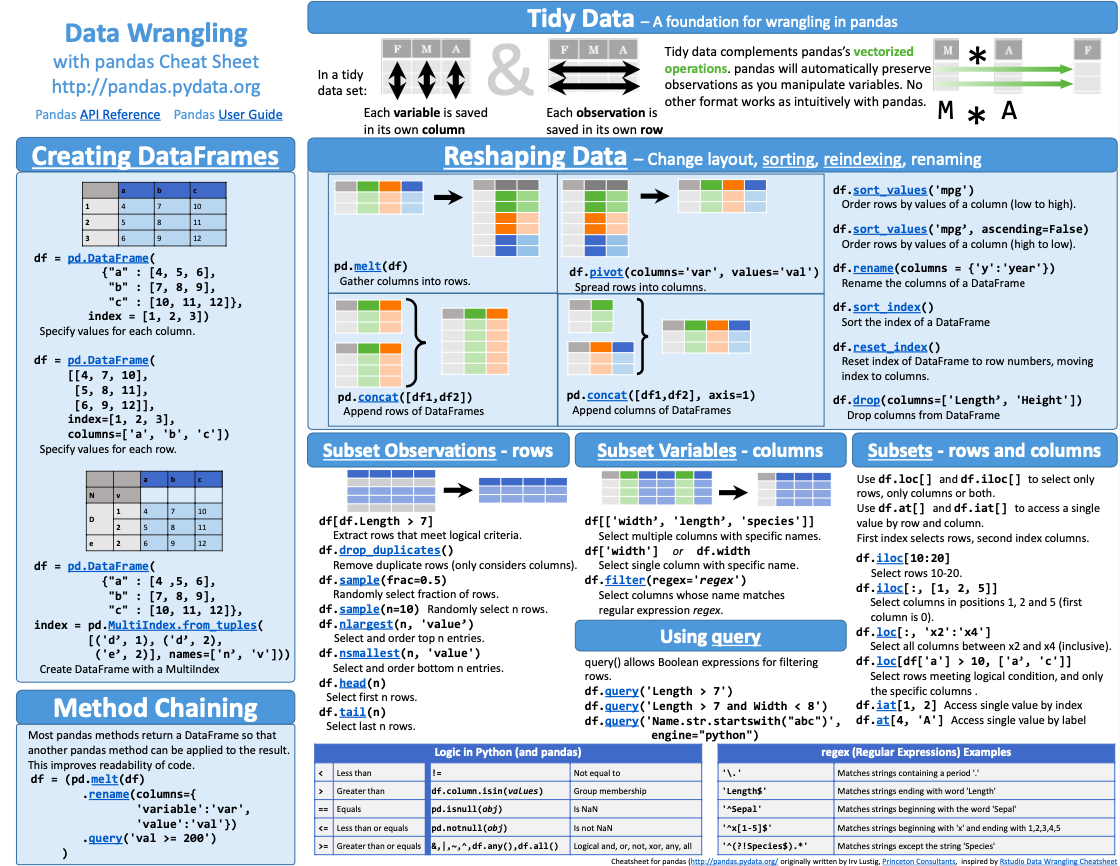

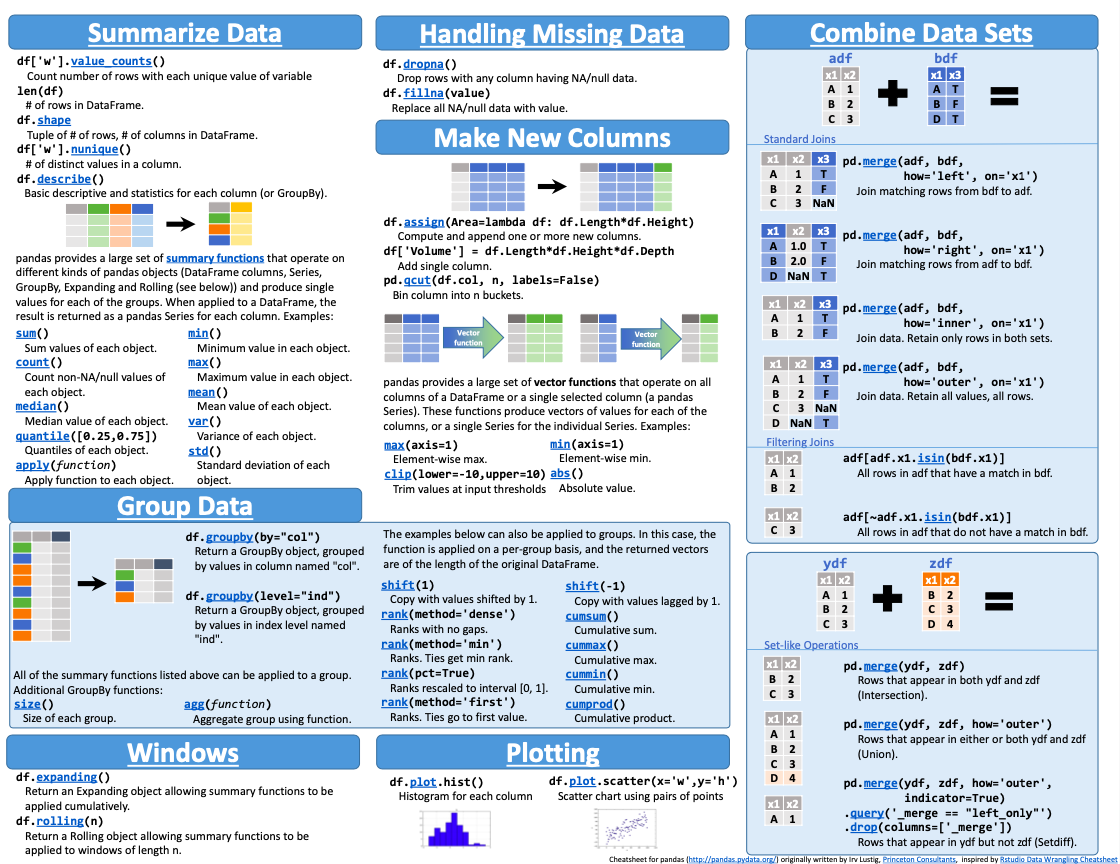